In [1]:
import assemblyfire 
from assemblyfire.topology import simplex_counts_consensus, simplex_counts_union, simplex_counts_core,\
simplex_counts_intersection, simplex_counts_core_vs_intersection


In [2]:
#Loading data
fn="/Users/egassant/Documents/plasticity.nosync/assemblies_simmat.h5"

consensus_assemblies= assemblyfire.utils.load_consensus_assemblies_from_h5(fn, prefix="consensus")
network=assemblyfire.NetworkAssembly.from_h5(fn, group_name="full_matrix", prefix="connectivity")
depths=network.depths
mtypes=network.mtypes

# Computing simplex counts and plotting

### Simplex counts by cluster vs. average random control

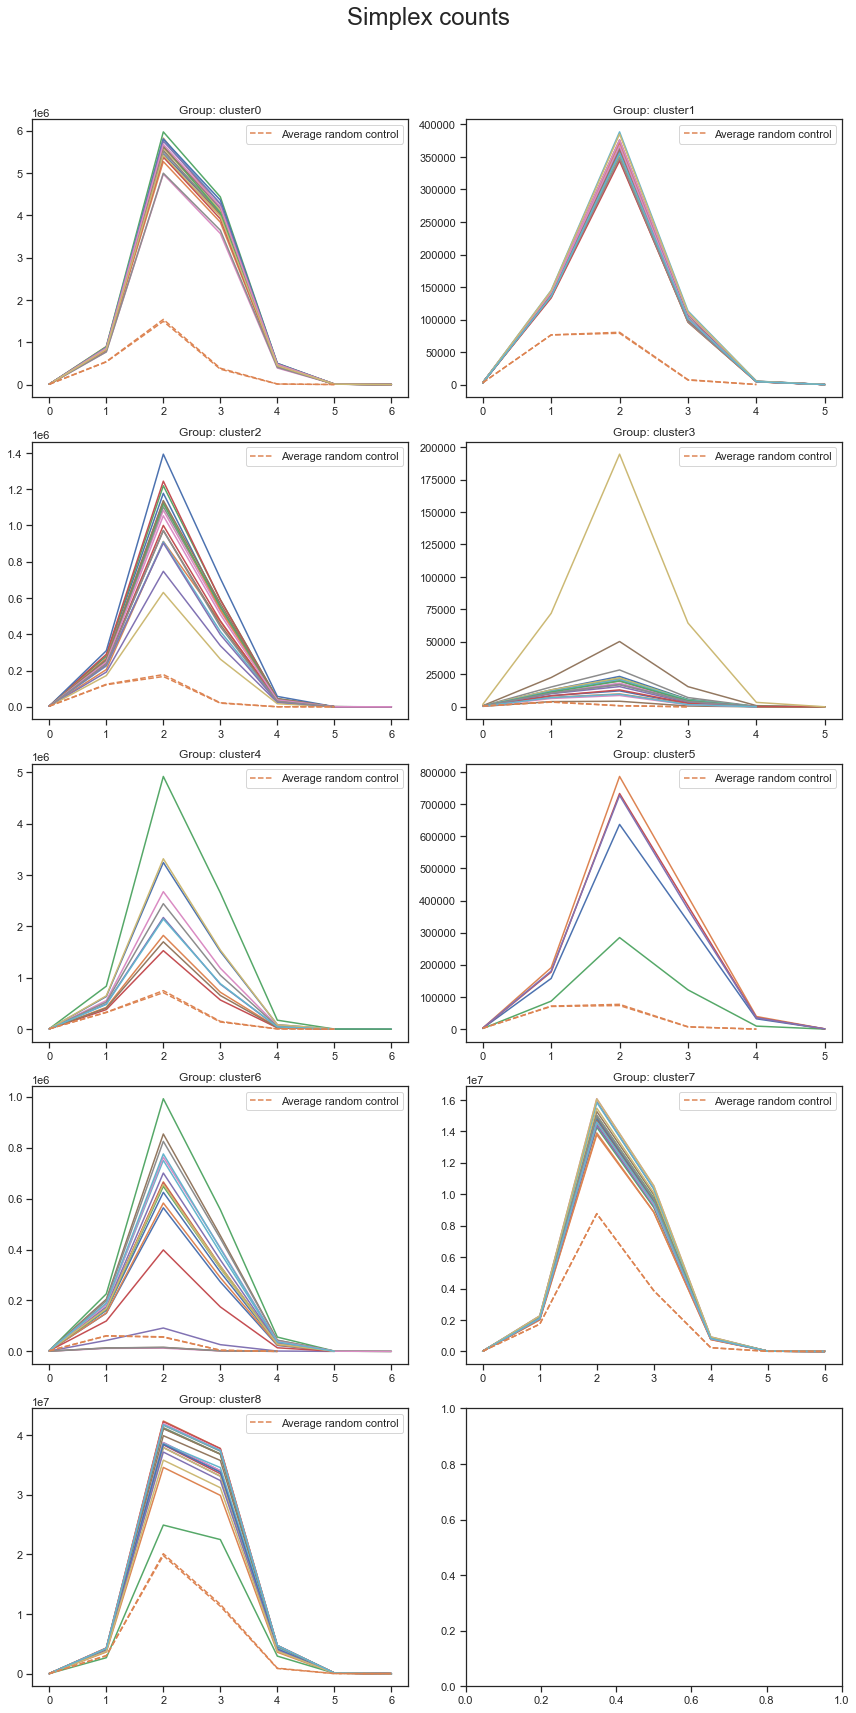

In [3]:
%matplotlib inline
simplex_counts,controls=simplex_counts_consensus(consensus_assemblies,network,2)
assemblyfire.plots.plot_simplex_counts(simplex_counts, [controls],["Average random control"])
#Add save_fig=True, path_fig=path to parameters to save figure to path

### Union vs. random control 

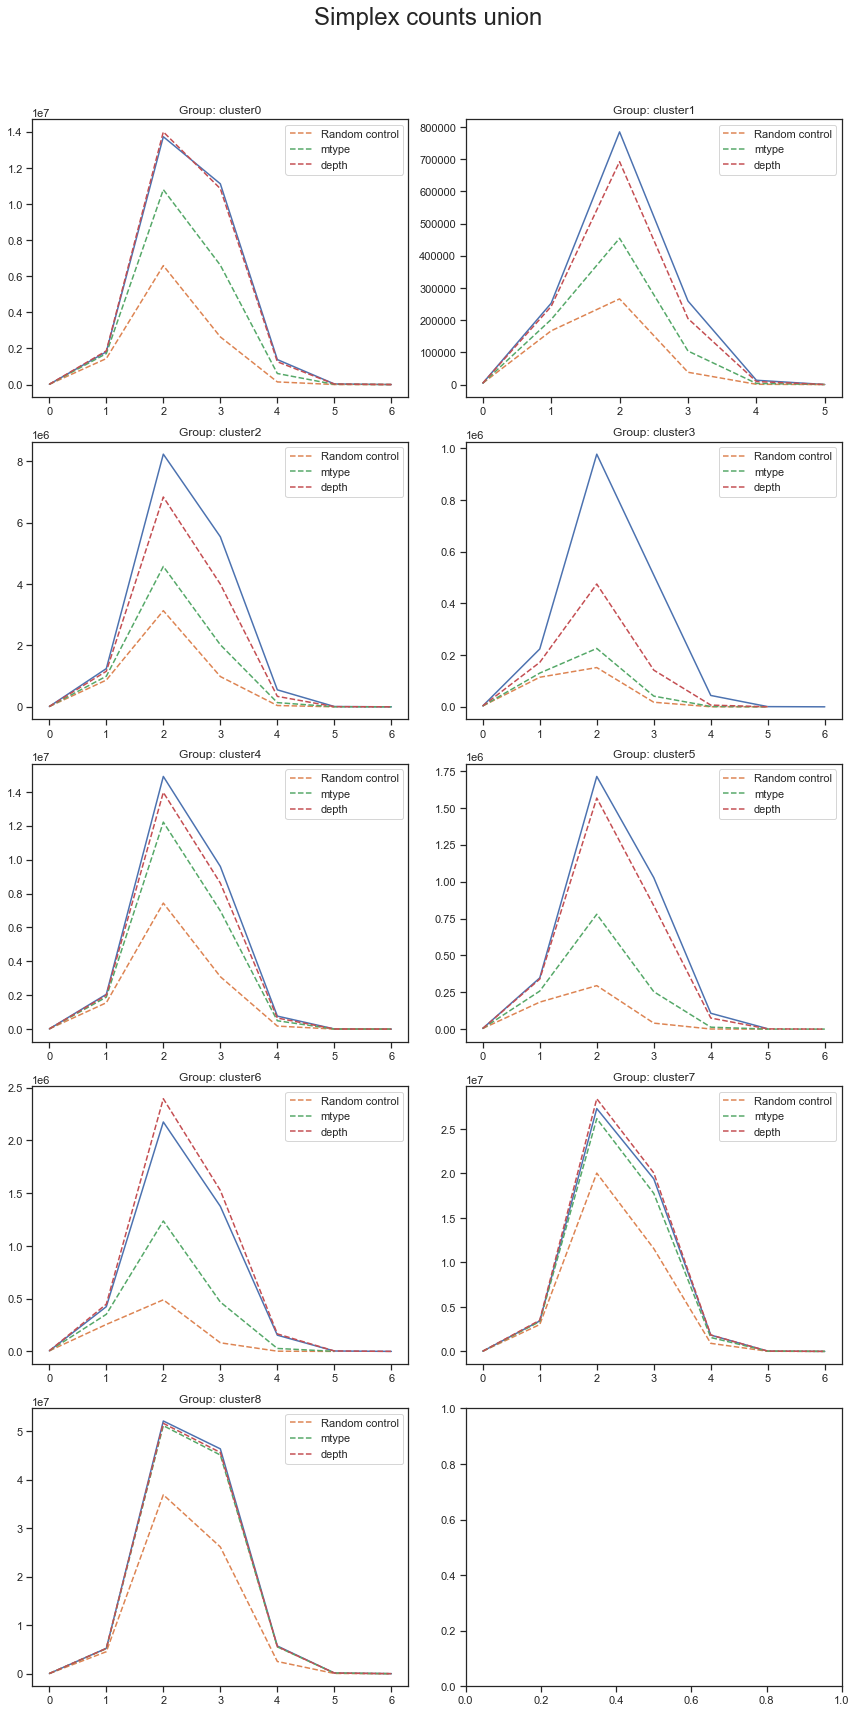

In [4]:
%matplotlib inline 
simplex_counts,controls=simplex_counts_union(consensus_assemblies,network,1)
assemblyfire.plots.plot_simplex_counts(simplex_counts, [controls["n"], controls["mtype"],controls["depth"]],\
                                       ["Random control", "mtype", "depth"], title="Simplex counts union")
#Add save_fig=True, path_fig=path to parameters to save figure to path

### Core vs. random control within union 

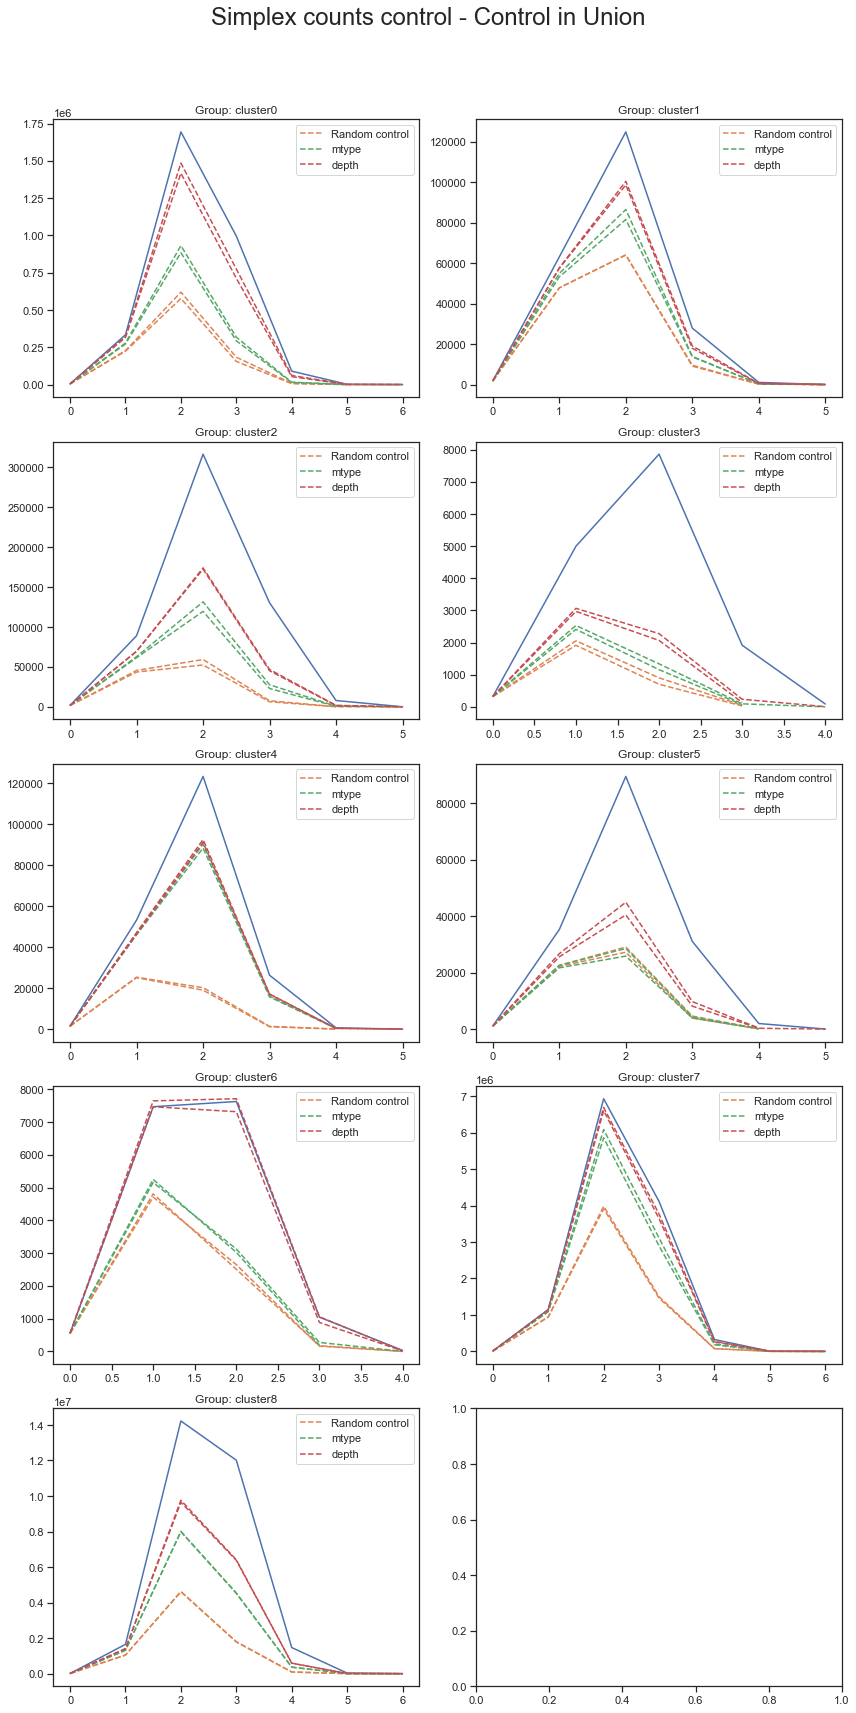

In [5]:
%matplotlib inline 
simplex_counts,controls=simplex_counts_core(consensus_assemblies,network,2)
assemblyfire.plots.plot_simplex_counts(simplex_counts, [controls["n"], controls["mtype"],controls["depth"]],\
                                       ["Random control", "mtype", "depth"], title="Simplex counts control - Control in Union")
#Add save_fig=True, path_fig=path to parameters to save figure to path

### Core vs. random control within entire circuit 

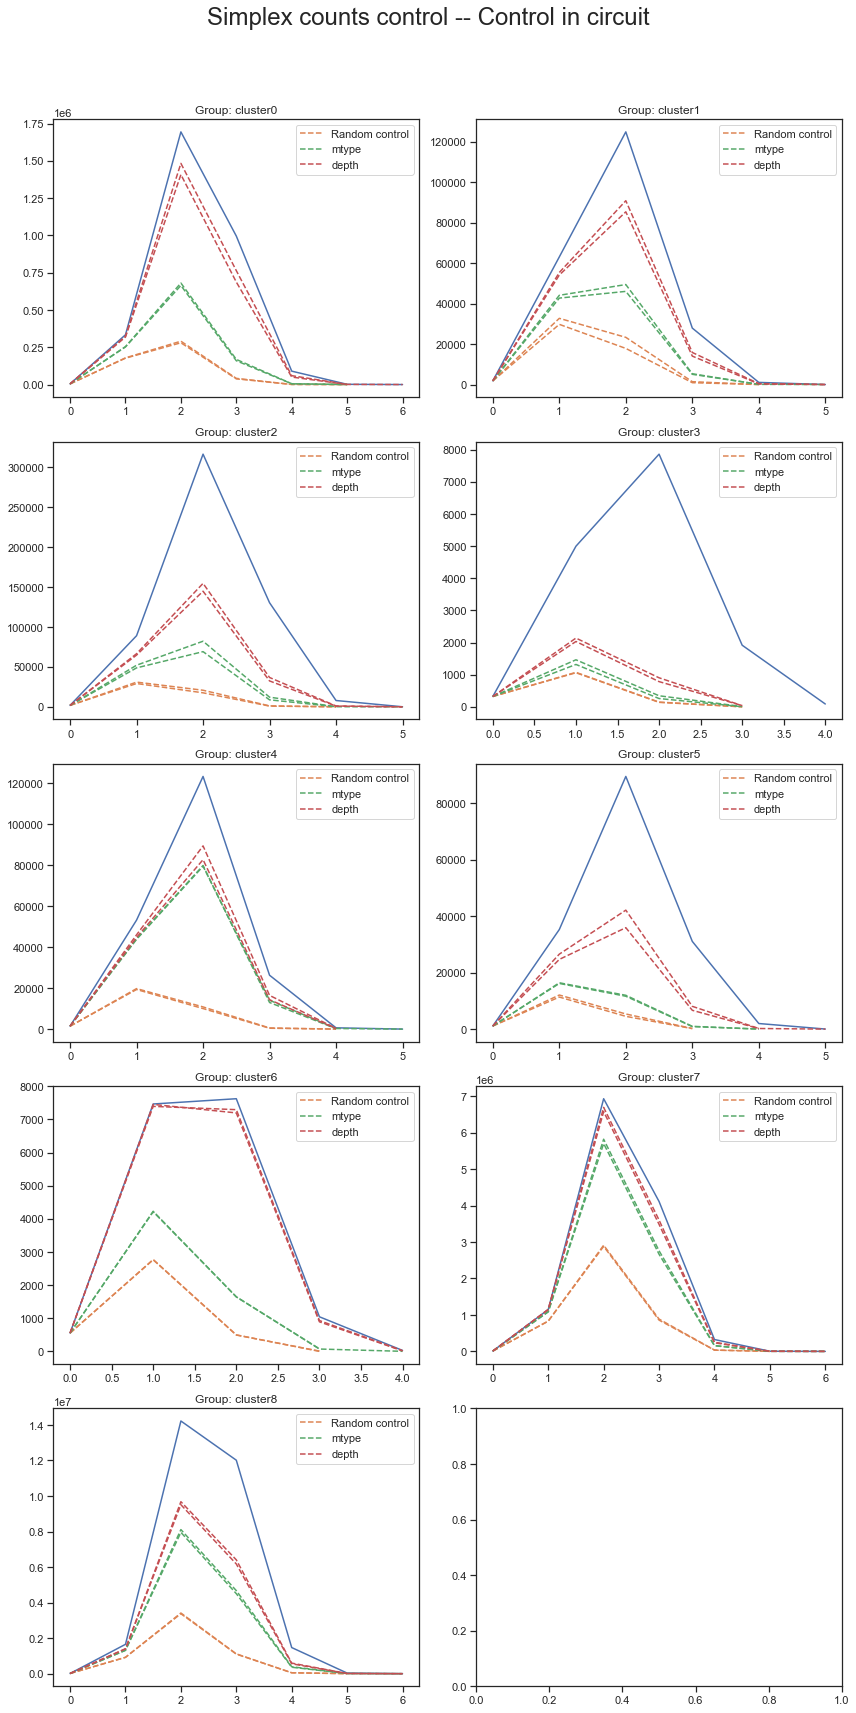

In [6]:
%matplotlib inline 
simplex_counts,controls=simplex_counts_core(consensus_assemblies,network,2,sample_type="all")
assemblyfire.plots.plot_simplex_counts(simplex_counts, [controls["n"], controls["mtype"],controls["depth"]],\
                                       ["Random control", "mtype", "depth"], title="Simplex counts control -- Control in circuit")
#Add save_fig=True, path_fig=path to parameters to save figure to path

### Intersection vs. random control within union 

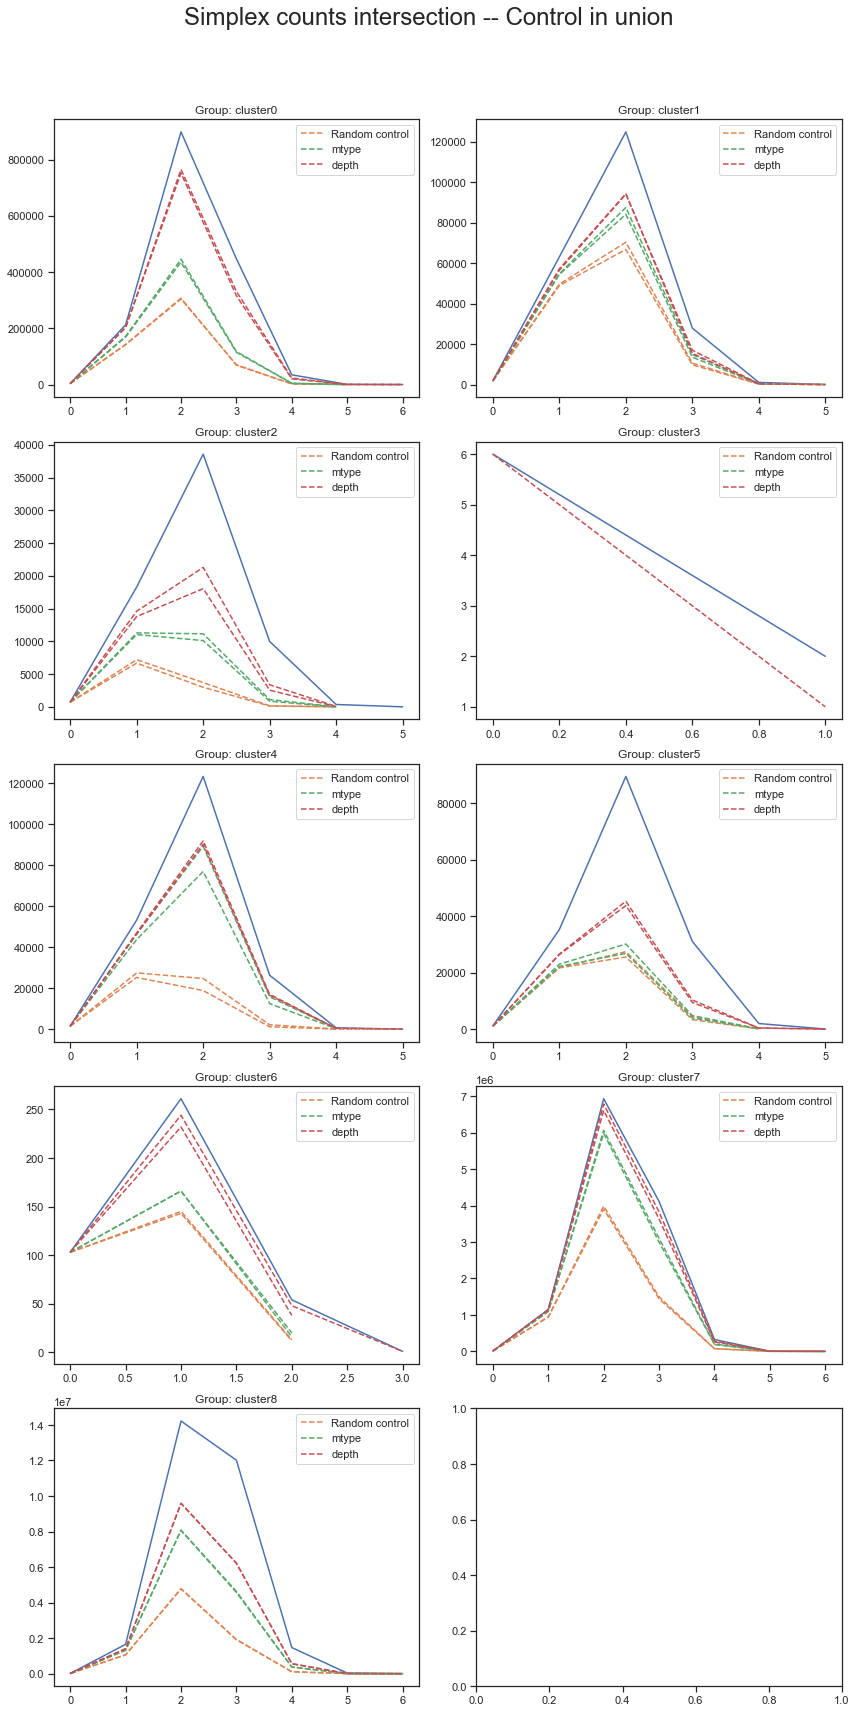

In [7]:
%matplotlib inline 
simplex_counts,controls=simplex_counts_intersection(consensus_assemblies,network,2)
assemblyfire.plots.plot_simplex_counts(simplex_counts, [controls["n"], controls["mtype"],controls["depth"]],\
                                       ["Random control", "mtype", "depth"], title="Simplex counts intersection -- Control in union")
#Add save_fig=True, path_fig=path to parameters to save figure to path

### Intersection vs. random control within all 

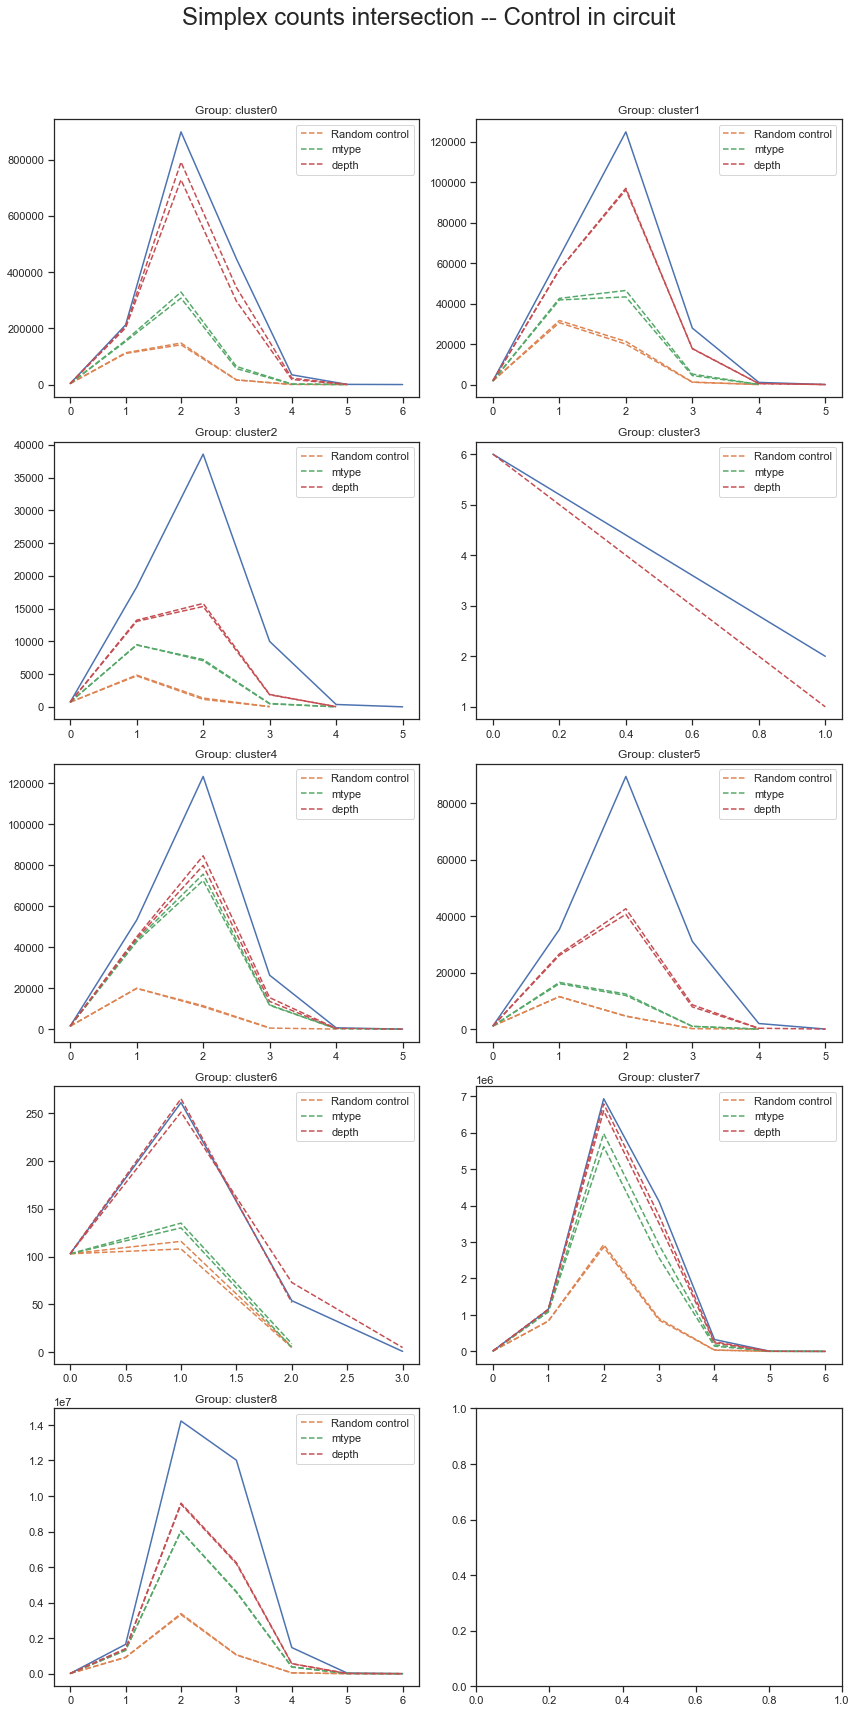

In [8]:
%matplotlib inline 
simplex_counts,controls=simplex_counts_intersection(consensus_assemblies,network,2, sample_type="all")
assemblyfire.plots.plot_simplex_counts(simplex_counts, [controls["n"], controls["mtype"],controls["depth"]],\
                                       ["Random control", "mtype", "depth"], title="Simplex counts intersection -- Control in circuit")
#Add save_fig=True, path_fig=path to parameters to save figure to path

### Core vs. Intersection 

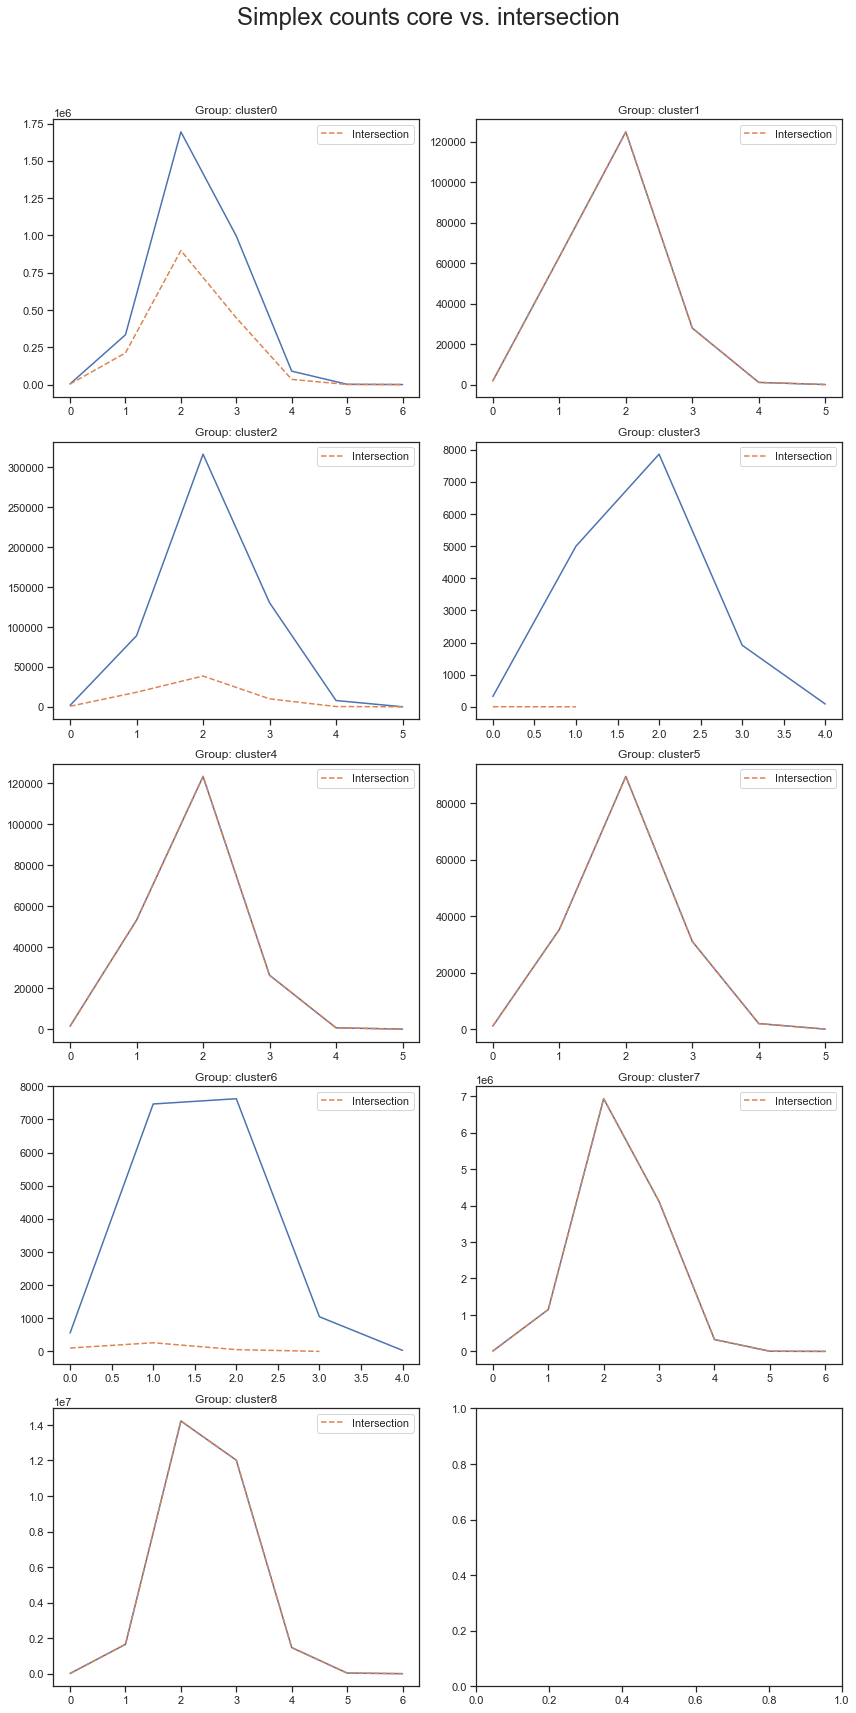

In [9]:
%matplotlib inline 
simplex_counts_core,simplex_counts_intersection=simplex_counts_core_vs_intersection(consensus_assemblies,network)
assemblyfire.plots.plot_simplex_counts(simplex_counts_core, [simplex_counts_intersection],["Intersection"], title="Simplex counts core vs. intersection")
#Add save_fig=True, path_fig=path to parameters to save figure to path